<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [15]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

In [13]:
!pip install matplotlib

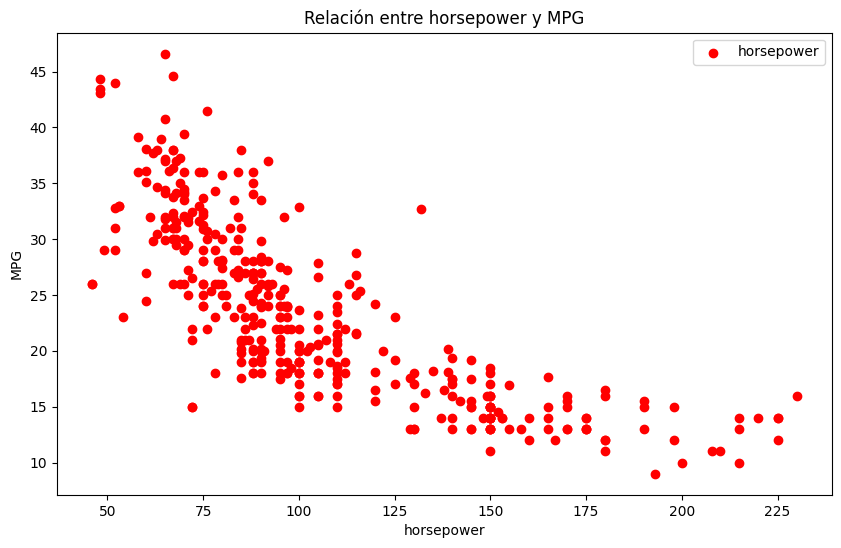

In [20]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # Dibuja la gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(df[nombre_columna], y, color='red', label=nombre_columna)
    plt.xlabel(nombre_columna)
    plt.ylabel('MPG')
    plt.title(f'Relación entre {nombre_columna} y MPG')
    plt.legend()
    plt.show()

# Asumiendo que X es el dataframe de características y y es la variable objetivo
visualiza(X, y, 'horsepower')


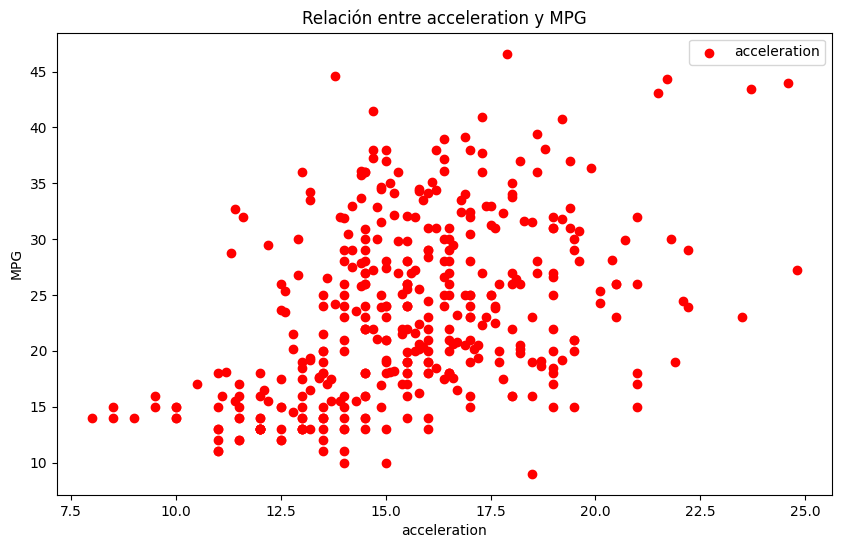

In [21]:
visualiza(X, y, 'acceleration')

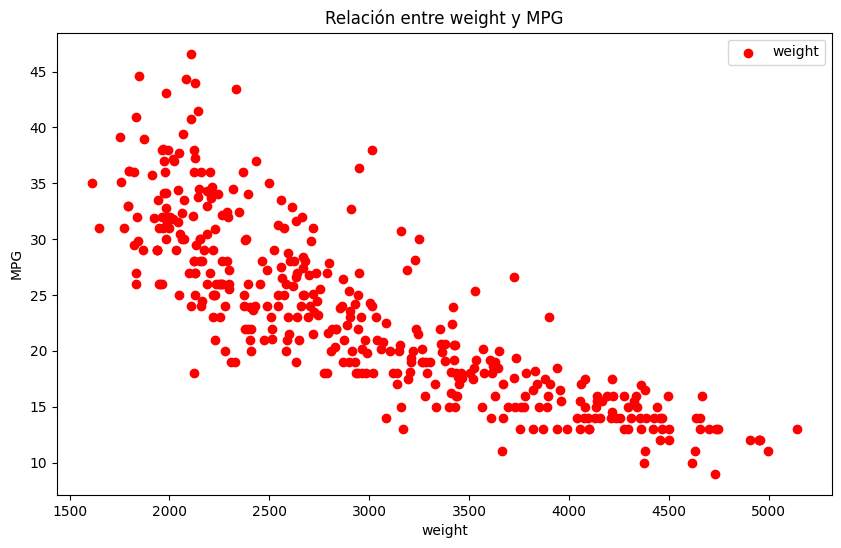

In [22]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [7]:
import numpy as np

def pesos_ols(X, y):
    # Convertir les données en arrays numpy et vérifier les dimensions
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    # Si le nombre de features est supérieur au nombre d'observations, transposer X
    if X.shape[0] < X.shape[1]:
        X = X.T
    
    # Ajouter une colonne de 1s à X pour le terme d'interception
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calculer les poids en utilisant l'équation normale
    XTX_inv = np.linalg.inv(X.T @ X)
    XTy = X.T @ y
    w = XTX_inv @ XTy
    
    return w




In [8]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([[-2.29223802e+06],
       [ 5.92536529e+01],
       [ 1.20780450e+03]])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

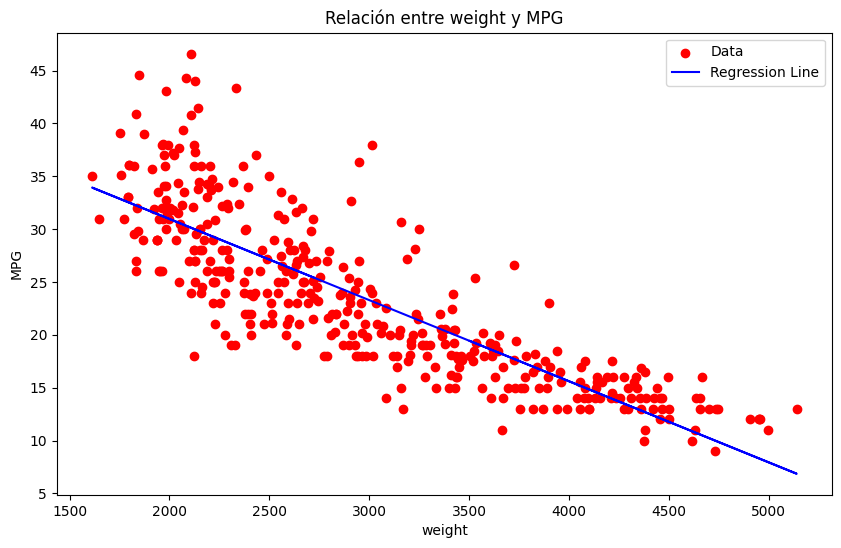

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# Data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Function to compute OLS weights
def pesos_ols(X, y):
    # Convert data to numpy arrays and check dimensions
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    # Add a column of 1s to X for the intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Compute weights using the normal equation
    XTX_inv = np.linalg.inv(X.T @ X)
    XTy = X.T @ y
    w = XTX_inv @ XTy
    
    return w

# Compute the OLS weights for the 'weight' feature
X_weight = X[['weight']]
w = pesos_ols(X_weight, y)

# Function to visualize data and regression line
def visualiza(df, y, nombre_columna, w):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the data
    plt.scatter(df[nombre_columna], y, color='red', label='Data')
    
    # Add regression line
    X_vals = np.hstack((np.ones((df.shape[0], 1)), df[[nombre_columna]].values))
    y_pred = X_vals @ w
    plt.plot(df[nombre_columna], y_pred, color='blue', label='Regression Line')
    
    plt.xlabel(nombre_columna)
    plt.ylabel('MPG')
    plt.title(f'Relación entre {nombre_columna} y MPG')
    plt.legend()
    plt.show()

# Visualize the data and the regression line
visualiza(X, y, 'weight', w)


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [4]:
!pip install scikit-learn


In [5]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



In [7]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_lr, y_lr)

# Obtener los coeficientes
print(f"Punto de corte: {lr.intercept_}")
print(f"Coeficiente: {lr.coef_[0]}")


Punto de corte: [46.31736442]
Coeficiente: [-0.00767661]


In [73]:
from sklearn.linear_model import SGDRegressor

# Créer et entraîner le modèle de régression linéaire avec descente de gradient
# avec un taux d'apprentissage spécifique (par exemple, 0.01)
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
sgd.fit(X_lr, y_lr)

# Obtenir les coefficients
print(f"Ordonnée à l'origine: {sgd.intercept_[0]}")
print(f"Coefficient: {sgd.coef_[0]}")





Ordonnée à l'origine: 10956248169.066757
Coefficient: 32813092778136.344


c:\Users\theot\OneDrive\Bureau\estadistica_datamining-main\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [76]:
import numpy as np

def descenso_gradiente(X, y, w0, n_iter, eta): 
    # Inicializamos variables
    iteraciones_perdida = []
    iteraciones_pesos = []
    w = w0
    
    # TODO 1 Añadir la columna de 1s para el término de intercepto
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añade una columna de 1s a X para el término de intercepto
    
    # Bucle para las iteraciones
    for i in range(n_iter):
        # TODO 2 Calcular las predicciones
        y_pred = X_b @ w
        
        # TODO 3 Calcular el error (función de pérdida)
        error = y_pred - y
        perdida = (1 / 2) * np.mean(error ** 2)
        iteraciones_perdida.append(perdida)
        
        # Calcular el gradiente
        gradiente = X_b.T @ error / X_b.shape[0]
        
        # Actualizar los pesos
        w = w - eta * gradiente
        iteraciones_pesos.append(w)
    
    # Devolver los resultados
    return np.array(iteraciones_pesos), np.array(iteraciones_perdida)

# Parámetros del descenso de gradiente
eta = 0.01 
iteraciones = 2000 

# Datos de ejemplo
np.random.seed(123)
w0 = np.random.rand(2, 1)  # Pesos iniciales

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5, 1))
X = np.array([[  0.37020659],
              [ -0.48234664],
              [  0.51483616],
              [  0.38352774],
              [  1.29888065]])

# Ejecución del descenso de gradiente
pesos, perdida = descenso_gradiente(X, y, w0, iteraciones, eta)

print(pesos[-1])


[[183695.36963666]
 [ 40682.97678324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [78]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

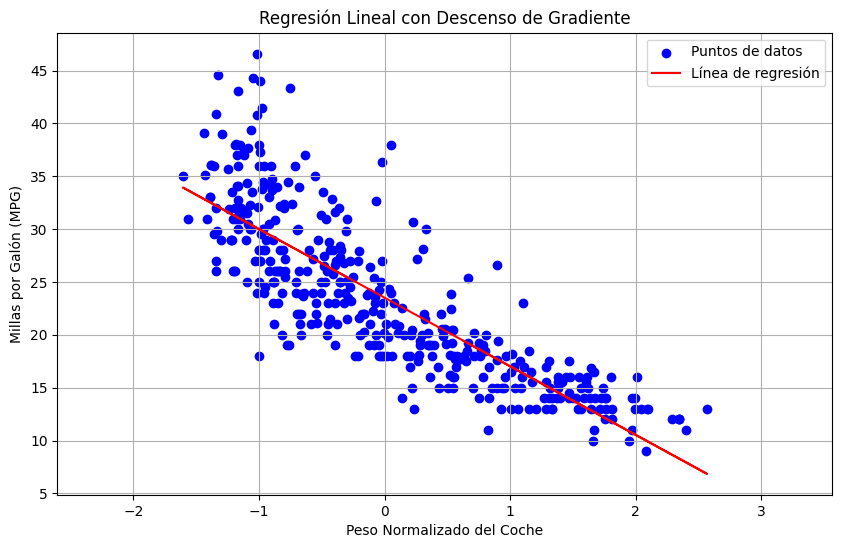

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

# Recuperar el conjunto de datos
auto_mpg = fetch_ucirepo(id=9) 

# Extraer los datos (características y objetivos)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Convertir a matrices NumPy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

# Normalización de los datos
X_gd = (X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1: Inicialización del punto de partida y la tasa de aprendizaje
w0 = np.random.rand(2, 1)  # Pesos iniciales (incluyendo el término de interceptación)
eta = 0.01  # Tasa de aprendizaje
n_iter = 2000  # Número de iteraciones

# Agregar una columna de 1s para el término de interceptación
X_b = np.c_[np.ones((X_gd.shape[0], 1)), X_gd]

# Función de descenso de gradiente
def descenso_gradiente(X, y, w0, n_iter, eta):
    perdidas_iter = []
    pesos_iter = []
    w = w0
    
    for i in range(n_iter):
        y_pred = X @ w
        error = y_pred - y
        perdida = (1 / 2) * np.mean(error ** 2)
        perdidas_iter.append(perdida)
        gradiente = X.T @ error / X.shape[0]
        w = w - eta * gradiente
        pesos_iter.append(w)
    
    return np.array(pesos_iter), np.array(perdidas_iter)

# TODO 2: Aplicar el algoritmo de descenso de gradiente
pesos, _ = descenso_gradiente(X_b, y_gd, w0, n_iter, eta)

# Calcular los valores predichos
y_pred = X_b @ pesos[-1]

# TODO 3: Dibujar el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_gd, y_gd, color='blue', label='Puntos de datos')

# Dibujar la línea de regresión
plt.plot(X_gd, y_pred, color='red', label='Línea de regresión')

plt.xlabel('Peso Normalizado del Coche')
plt.ylabel('Millas por Galón (MPG)')
plt.title('Regresión Lineal con Descenso de Gradiente')
plt.legend()
plt.grid(True)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) - 1
plt.xlim(x_min, x_max)

plt.show()
